In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
ops_daily = pd.read_csv(r'D:\kowsi\project_works\Advanced_Forecasting_Anomaly_Detection\logic_leap_horizon_datasets\operations_daily_365d.csv')
site_meta = pd.read_csv(r'D:\kowsi\project_works\Advanced_Forecasting_Anomaly_Detection\logic_leap_horizon_datasets\site_meta.csv')



In [5]:

# Convert date to datetime
ops_daily['date'] = pd.to_datetime(ops_daily['date'])


In [6]:

# Basic info
print(ops_daily.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    1460 non-null   datetime64[ns]
 1   site_id                 1460 non-null   object        
 2   units_produced          1460 non-null   int64         
 3   downtime_minutes        1460 non-null   int64         
 4   power_kwh               1460 non-null   int64         
 5   rework_units            1460 non-null   int64         
 6   defects_ppm             1460 non-null   int64         
 7   staff_count             1460 non-null   int64         
 8   material_cost_per_unit  1460 non-null   float64       
 9   price_per_unit          1460 non-null   float64       
 10  temperature_c           1460 non-null   float64       
 11  rainfall_mm             1460 non-null   float64       
 12  holiday_flag            1460 non-null   int64   

In [7]:
print(ops_daily.describe())


                                date  units_produced  downtime_minutes  \
count                           1460     1460.000000       1460.000000   
mean   2025-07-01 23:59:59.999999744     1207.762329         61.685616   
min              2025-01-01 00:00:00        0.000000          0.000000   
25%              2025-04-02 00:00:00     1116.000000         42.000000   
50%              2025-07-02 00:00:00     1276.000000         56.000000   
75%              2025-10-01 00:00:00     1422.000000         69.000000   
max              2025-12-31 00:00:00     1882.000000        333.000000   
std                              NaN      372.807641         47.356136   

         power_kwh  rework_units  defects_ppm  staff_count  \
count  1460.000000   1460.000000  1460.000000  1460.000000   
mean   4274.854110     26.997945   423.368493    51.546575   
min       0.000000      0.000000     0.000000     0.000000   
25%    3961.500000     22.000000   375.000000    50.000000   
50%    4456.000000     

In [8]:

# Check for missing values
print(ops_daily.isnull().sum())


date                      0
site_id                   0
units_produced            0
downtime_minutes          0
power_kwh                 0
rework_units              0
defects_ppm               0
staff_count               0
material_cost_per_unit    0
price_per_unit            0
temperature_c             0
rainfall_mm               0
holiday_flag              0
dtype: int64


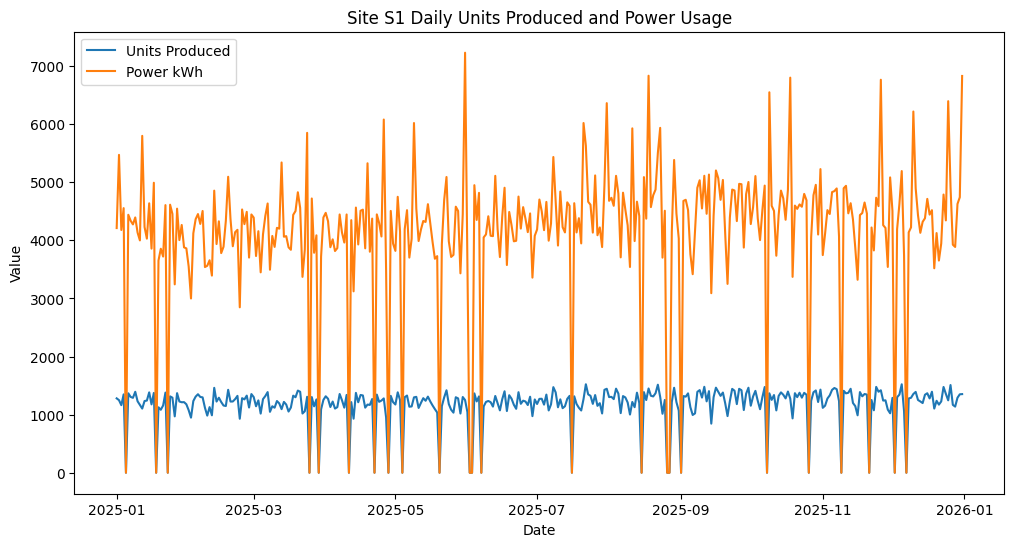

In [9]:

# Visualize units produced over time for a sample site
sample_site = 'S1'
site_data = ops_daily[ops_daily['site_id'] == sample_site]
plt.figure(figsize=(12,6))
plt.plot(site_data['date'], site_data['units_produced'], label='Units Produced')
plt.plot(site_data['date'], site_data['power_kwh'], label='Power kWh')
plt.title(f'Site {sample_site} Daily Units Produced and Power Usage')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


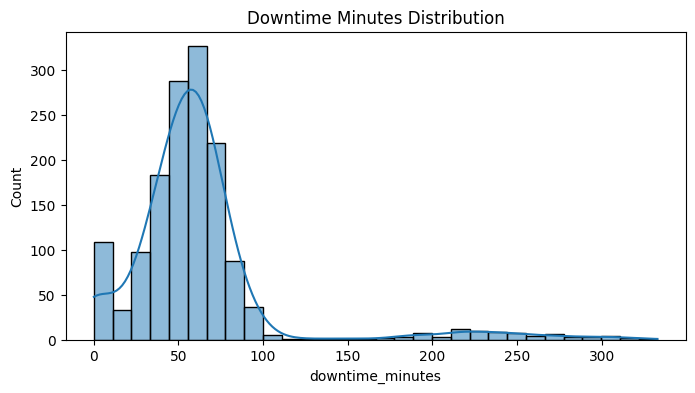

In [10]:

# Distribution of downtime minutes
plt.figure(figsize=(8,4))
sns.histplot(ops_daily['downtime_minutes'], bins=30, kde=True)
plt.title('Downtime Minutes Distribution')
plt.show()


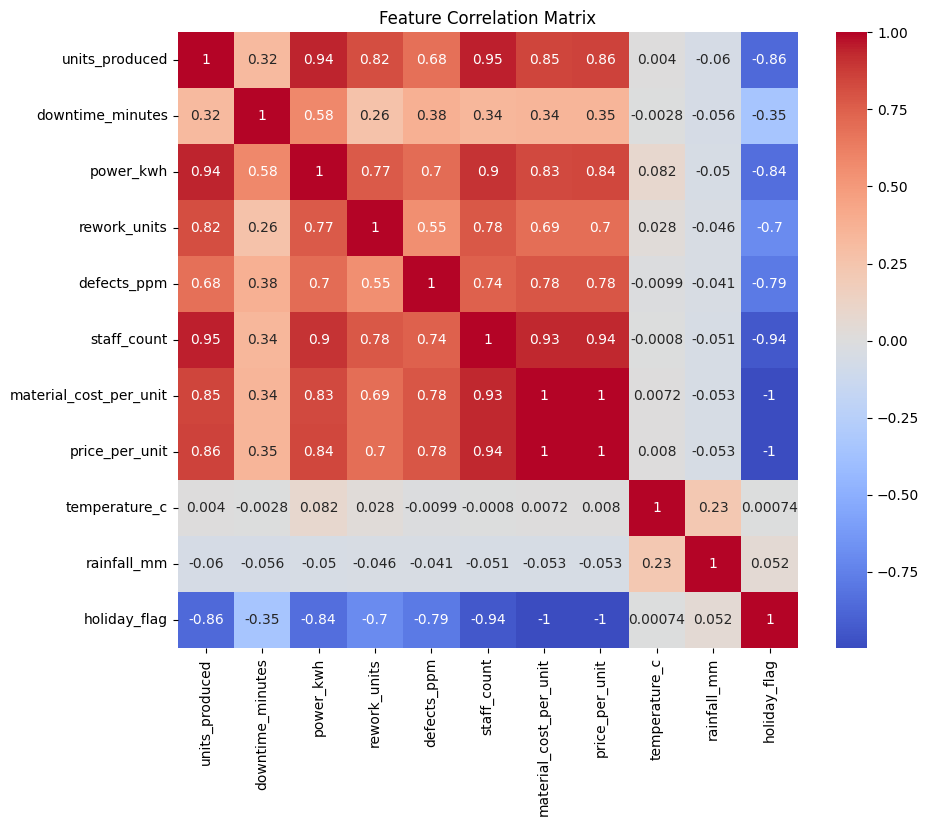

In [12]:
# Correlation heatmap using only numeric columns
plt.figure(figsize=(10,8))
corr = ops_daily.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()
